# Einladen und Klassen

In [263]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
import pandas as pd
from scipy.stats import linregress
%matplotlib inline
plt.rcParams.update({'font.size': 18})

In [264]:
class gas:
    def __init__(self,path,label) -> None:
        self.df=pd.read_csv(path)
        self.df.astype(float)
        self.label=label
    def membran(self,stop):
        reg_membran = linregress(np.array(self.df["Bara1"][:stop]),np.array(self.df["Membran"][:stop]))
        f_reg_membran = lambda x: reg_membran.slope*x+reg_membran.intercept

        fig = plt.figure(figsize=(11, 6))
        gs = GridSpec(8, 5)
        fig1 = fig.add_subplot(gs[:, :])
        fig1.set_title("Membran-Vakuumeter")
        fig1.set_ylabel(r"$p_{\mathrm{Membran}}$")
        fig1.set_xlabel("$p_{\mathrm{Baratron 1}}$")
        fig1.scatter(self.df["Bara1"][:stop],self.df["Membran"][:stop],c="C0",label="Gemessener Druck")
        fig1.plot(self.df["Bara1"][:stop],f_reg_membran(self.df["Bara1"][:stop]),c="C0",label="Lineare Regression")
        plt.tight_layout()
        plt.savefig(f"plots/vakuumeter/membran_{self.label}.pdf")
        plt.show()
    def pirani(self,start):
        fig = plt.figure(figsize=(11, 6))
        gs = GridSpec(8, 5)
        fig1 = fig.add_subplot(gs[:, :])
        fig1.set_title("Pirani-Vakuumeter")
        fig1.set_ylabel(r"$p_{\mathrm{Pirani}}$")
        fig1.set_xlabel("$p_{\mathrm{Baratron 1}}$")
        fig1.scatter(self.df["Bara1"],self.df["Pirani"],c="C0",label="Gemessener Druck")
        plt.tight_layout()
        plt.savefig(f"plots/vakuumeter/pirani_{self.label}_1.pdf")
        plt.show()

        fig = plt.figure(figsize=(11, 6))
        gs = GridSpec(8, 5)
        fig1 = fig.add_subplot(gs[:, :])
        fig1.set_title("Pirani-Vakuumeter")
        fig1.set_ylabel(r"$p_{\mathrm{Pirani}}$")
        fig1.set_xlabel("$p_{\mathrm{Baratron 2}}$")
        fig1.scatter(self.df["Bara2"][start:],self.df["Pirani"][start:],c="C0",label="Gemessener Druck P")
        # fig1.set_xscale("log")
        plt.tight_layout()
        plt.savefig(f"plots/vakuumeter/pirani_{self.label}_2.pdf")
        # plt.legend()
        plt.show()
    def ionivac_penning(self,start):
        fig = plt.figure(figsize=(11, 6))
        gs = GridSpec(8, 5)
        fig1 = fig.add_subplot(gs[:, :])
        fig1.set_title("Penning und Ionivac-Vakuumeter")
        fig1.set_ylabel(r"$p_{\mathrm{Pirani}}$")
        fig1.set_xlabel("$p_{\mathrm{Baratron 1}}$")
        fig1.scatter(self.df["Bara2"][start:],self.df["Penning1"][start:],c="C0",label="Penning")
        fig1.scatter(self.df["Bara2"][start:],self.df["Ionivac"][start:],c="C1",label="Ionivac")
        plt.tight_layout()
        plt.legend()
        plt.savefig(f"plots/vakuumeter/ion_pen_{self.label}.pdf")
        plt.show()

In [265]:
class gas_together:
    def __init__(self,path,path2,label,label2) -> None:
        self.df=pd.read_csv(path)
        self.df.astype(float)
        self.df2=pd.read_csv(path2)
        self.df2.astype(float)
        self.label=label
        self.label2=label2
    def membran(self,stop,stop2):
        reg_membran = linregress(np.array(self.df["Bara1"][:stop]),np.array(self.df["Membran"][:stop]))
        f_reg_membran = lambda x: reg_membran.slope*x+reg_membran.intercept

        reg_membran2 = linregress(np.array(self.df2["Bara1"][:stop2]),np.array(self.df2["Membran"][:stop2]))
        f_reg_membran2 = lambda x: reg_membran2.slope*x+reg_membran2.intercept

        fig = plt.figure(figsize=(11, 6))
        gs = GridSpec(8, 5)
        fig1 = fig.add_subplot(gs[:, :])
        fig1.set_title("Membran-Vakuumeter")
        fig1.set_ylabel(r"$p_{\mathrm{Membran}}$ in torr")
        fig1.set_xlabel("$p_{\mathrm{Baratron 1}}$ in torr")
        fig1.scatter(self.df["Bara1"][:stop],self.df["Membran"][:stop],c="C0",label="Gemessener Druck Luft")
        fig1.plot(self.df["Bara1"][:stop],f_reg_membran(self.df["Bara1"][:stop]),c="C0",label="Lineare Regression Luft")
        fig1.scatter(self.df2["Bara1"][:stop],self.df2["Membran"][:stop],c="C1",label="Gemessener Druck Helium")
        fig1.plot(self.df2["Bara1"][:stop],f_reg_membran2(self.df2["Bara1"][:stop]),c="C1",label="Lineare Regression Helium")
        plt.tight_layout()
        plt.legend()
        plt.savefig(f"plots/vakuumeter/membran_{self.label}_{self.label2}.pdf")
        plt.show()
    def pirani(self,start,start2):
        fig = plt.figure(figsize=(11, 6))
        gs = GridSpec(8, 5)
        fig1 = fig.add_subplot(gs[:, :])
        fig1.set_title("Pirani-Vakuumeter")
        fig1.set_ylabel(r"$p_{\mathrm{Pirani}}$ in $10$mbar$/100$")
        fig1.set_xlabel("$p_{\mathrm{Baratron 1}}$ in torr")
        fig1.scatter(self.df["Bara1"],self.df["Pirani"],c="C0",label="Luft")
        fig1.scatter(self.df2["Bara1"],self.df2["Pirani"],c="C1",label="Helium")
        plt.tight_layout()
        plt.legend()
        plt.savefig(f"plots/vakuumeter/pirani_{self.label}_{self.label2}_1.pdf")
        plt.show()

        fig = plt.figure(figsize=(11, 6))
        gs = GridSpec(8, 5)
        fig1 = fig.add_subplot(gs[:, :])
        fig1.set_title("Pirani-Vakuumeter")
        fig1.set_ylabel(r"$p_{\mathrm{Pirani}}$ in $10$mbar$/100$")
        fig1.set_xlabel("$p_{\mathrm{Baratron 2}}$ in torr")
        fig1.scatter(self.df["Bara2"][start:],self.df["Pirani"][start:],c="C0",label="Luft")
        fig1.scatter(self.df2["Bara2"][start2:],self.df2["Pirani"][start2:],c="C1",label="Helium")
        # fig1.set_xscale("log")
        plt.tight_layout()
        plt.legend()
        plt.savefig(f"plots/vakuumeter/pirani_{self.label}_{self.label2}_2.pdf")
        plt.show()
    def ionivac_penning(self,start,start2):
        reg_pen_luft = linregress(self.df["Bara2"][start:],self.df["Penning1"][start:])
        f_reg_pen_luft = lambda x: reg_pen_luft.slope*x+reg_pen_luft.intercept
        reg_ion_luft = linregress(self.df["Bara2"][start:],self.df["Ionivac"][start:])
        f_reg_ion_luft = lambda x: reg_ion_luft.slope*x+reg_ion_luft.intercept
        reg_pen_hel = linregress(self.df2["Bara2"][start2:],self.df2["Penning1"][start2:])
        f_reg_pen_hel = lambda x: reg_pen_hel.slope*x+reg_pen_hel.intercept
        reg_ion_hel = linregress(self.df2["Bara2"][start2:],self.df2["Ionivac"][start2:])
        f_reg_ion_hel = lambda x: reg_ion_hel.slope*x+reg_ion_hel.intercept
        fig = plt.figure(figsize=(11, 6))
        gs = GridSpec(8, 5)
        fig1 = fig.add_subplot(gs[:, :])
        fig1.set_title("Penning und Ionivac-Vakuumeter")
        fig1.set_ylabel(r"$p$ in mbar")
        fig1.set_xlabel("$p_{\mathrm{Baratron 1}}$ in torr")
        fig1.scatter(self.df["Bara2"][start:],self.df["Penning1"][start:],c="C0",label="Penning Luft")
        fig1.scatter(self.df["Bara2"][start:],self.df["Ionivac"][start:],c="C1",label="Ionivac Luft")
        fig1.scatter(self.df2["Bara2"][start2:],self.df2["Penning1"][start2:],c="C2",label="Penning Helium")
        fig1.scatter(self.df2["Bara2"][start2:],self.df2["Ionivac"][start2:],c="C3",label="Ionivac Helium")
        fig1.plot(self.df["Bara2"][start:],f_reg_pen_luft(self.df["Bara2"][start:]),c="C0")
        fig1.plot(self.df["Bara2"][start:],f_reg_ion_luft(self.df["Bara2"][start:]),c="C1")
        fig1.plot(self.df2["Bara2"][start2:],f_reg_pen_hel(self.df2["Bara2"][start2:]),c="C2")
        fig1.plot(self.df2["Bara2"][start2:],f_reg_ion_hel(self.df2["Bara2"][start2:]),c="C3")
        plt.tight_layout()
        plt.legend()
        plt.savefig(f"plots/vakuumeter/ion_pen_{self.label}_{self.label2}.pdf")
        plt.show()
        print(reg_pen_luft)
        print(f"Umrechnungsfaktor Penning luft/hel {reg_pen_luft.slope/reg_pen_hel.slope} pm {reg_pen_luft.stderr/reg_pen_hel.slope+reg_pen_hel.stderr*reg_pen_luft.slope/reg_pen_hel.slope**2}")
        print(f"Umrechnungsfaktor Ionivac luft/hel {reg_ion_luft.slope/reg_ion_hel.slope} pm {reg_ion_luft.stderr/reg_ion_hel.slope+reg_ion_hel.stderr*reg_ion_luft.slope/reg_ion_hel.slope**2}")

# Luft

## Init

In [266]:
luft=gas("data/vakuumeter/Luft.csv","luft")

## Membran

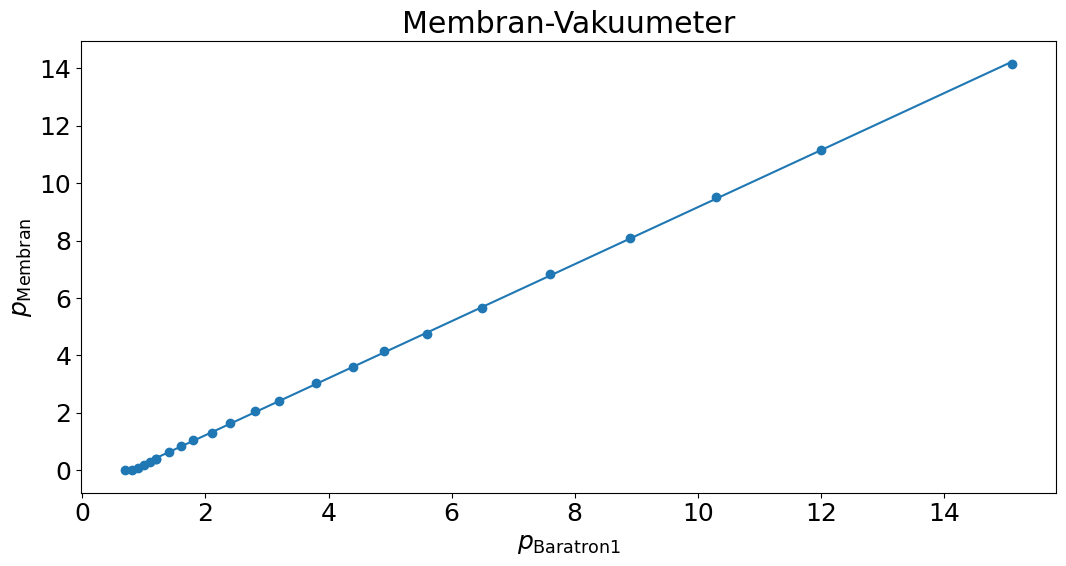

In [267]:
luft.membran(24)

## Pirani

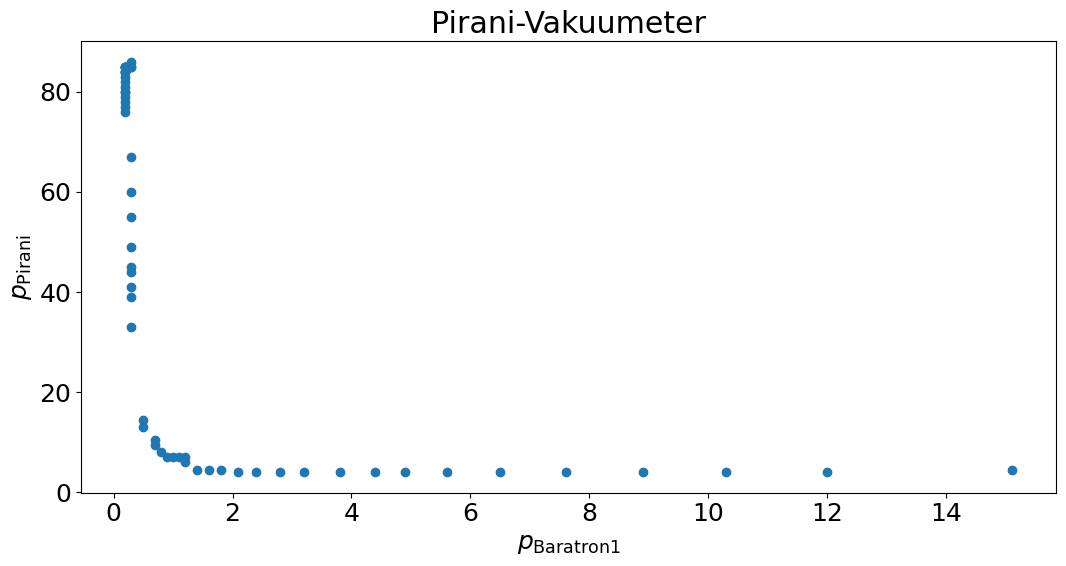

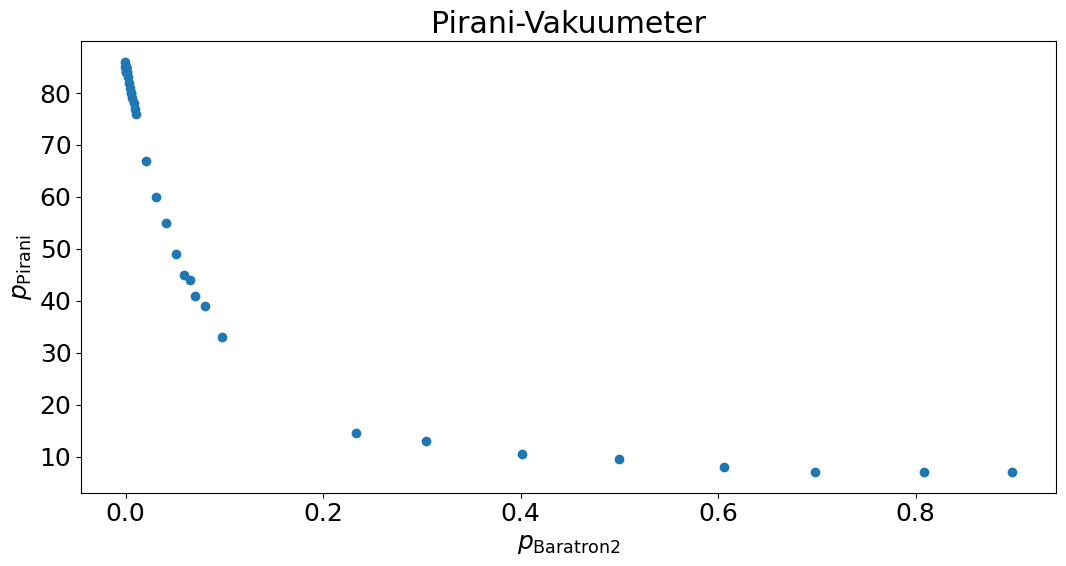

In [268]:
luft.pirani(19)

## Ionivac und Penning

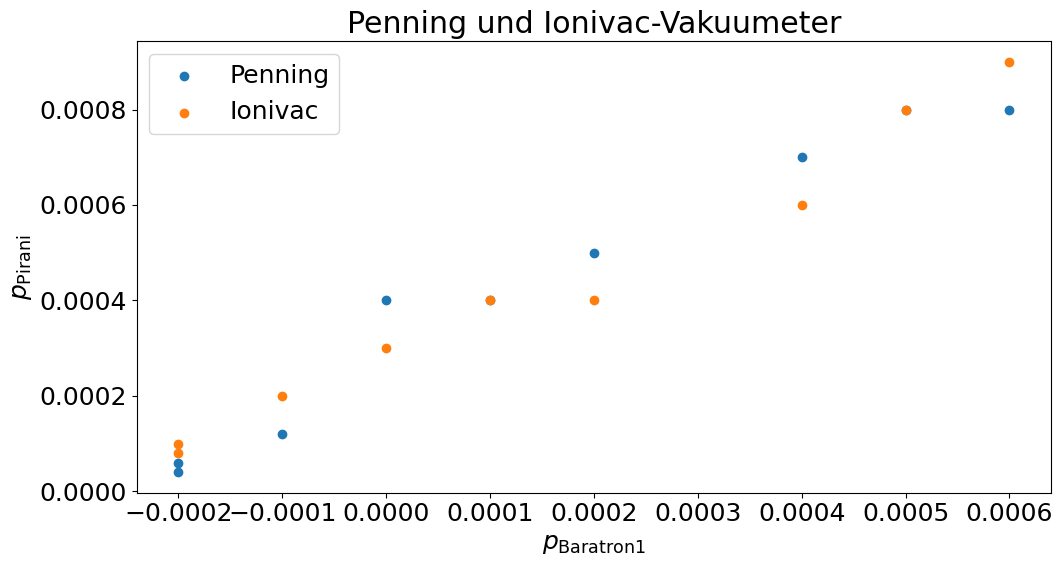

In [269]:
luft.ionivac_penning(48)

# Helium

## Init

In [270]:
helium=gas("data/vakuumeter/Helium.csv","helium")

## Membran

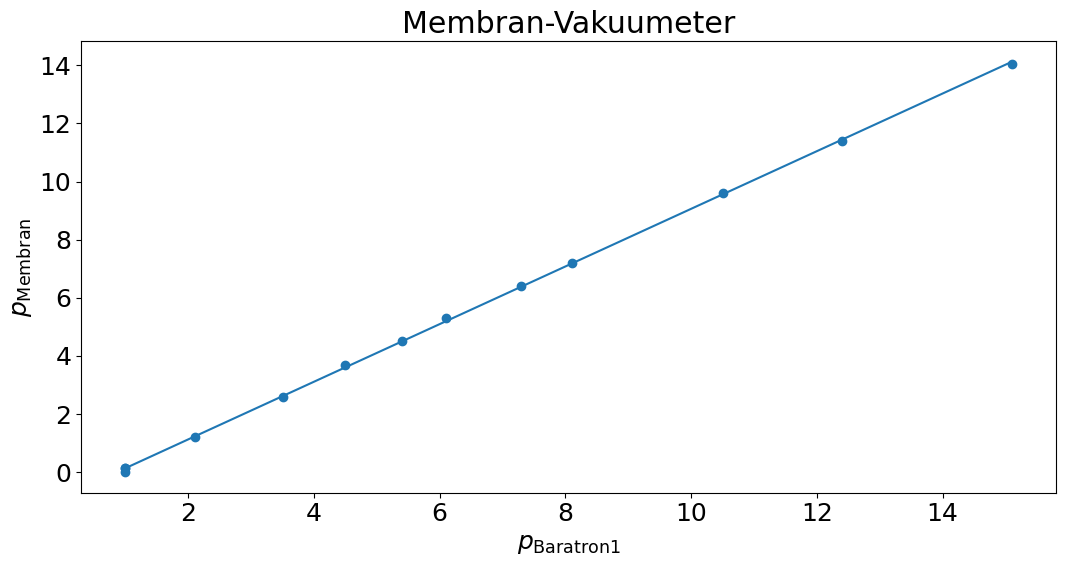

In [271]:
helium.membran(13)

## Pirani

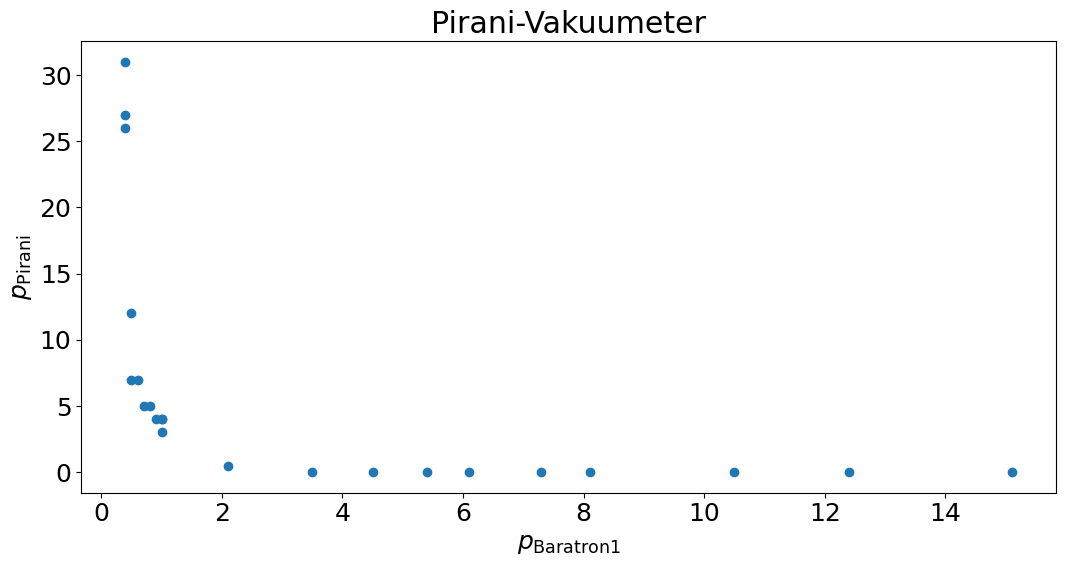

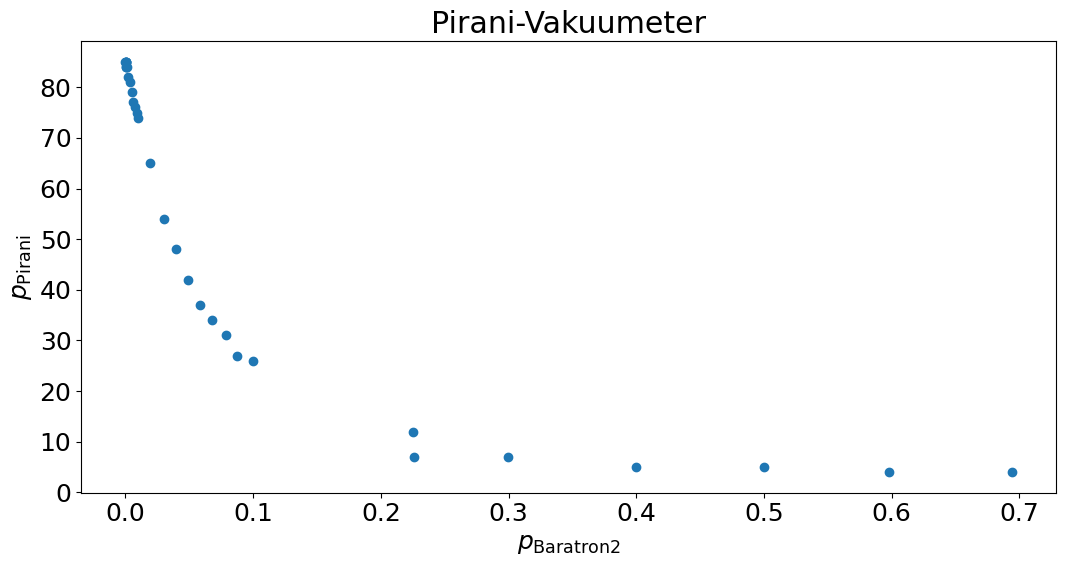

In [272]:
helium.pirani(12)

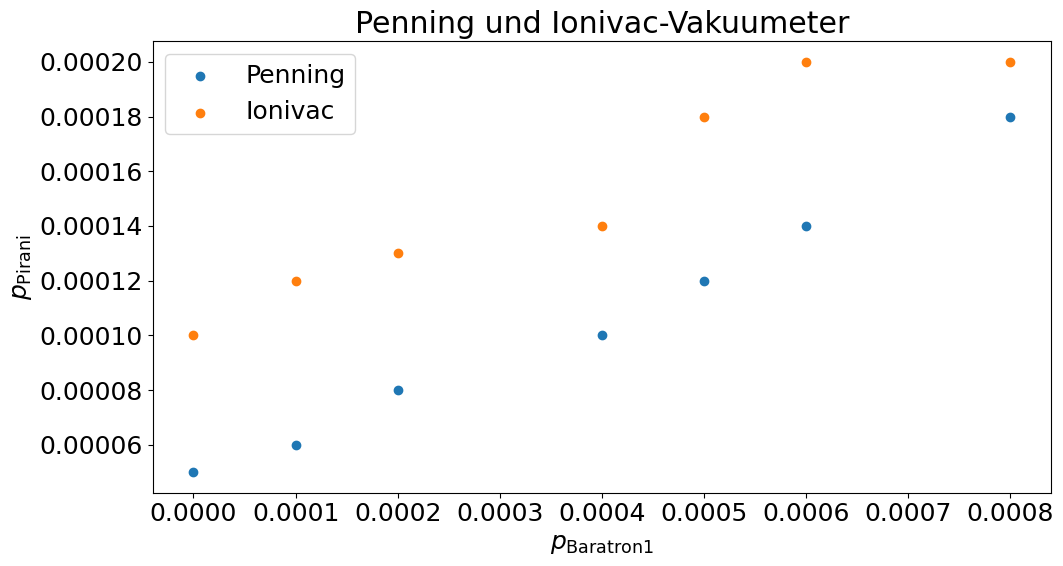

In [273]:
helium.ionivac_penning(36)

# Beide

## Init

In [274]:
beide=gas_together("data/vakuumeter/Luft.csv","data/vakuumeter/Helium.csv","luft","helium")

## Membran

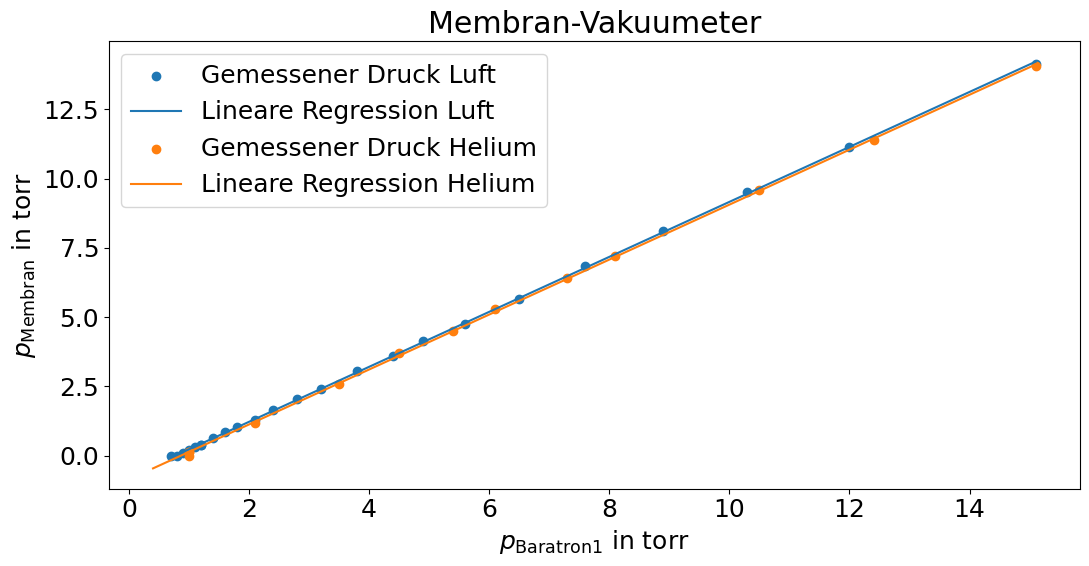

In [275]:
beide.membran(24,13)

## Pirani

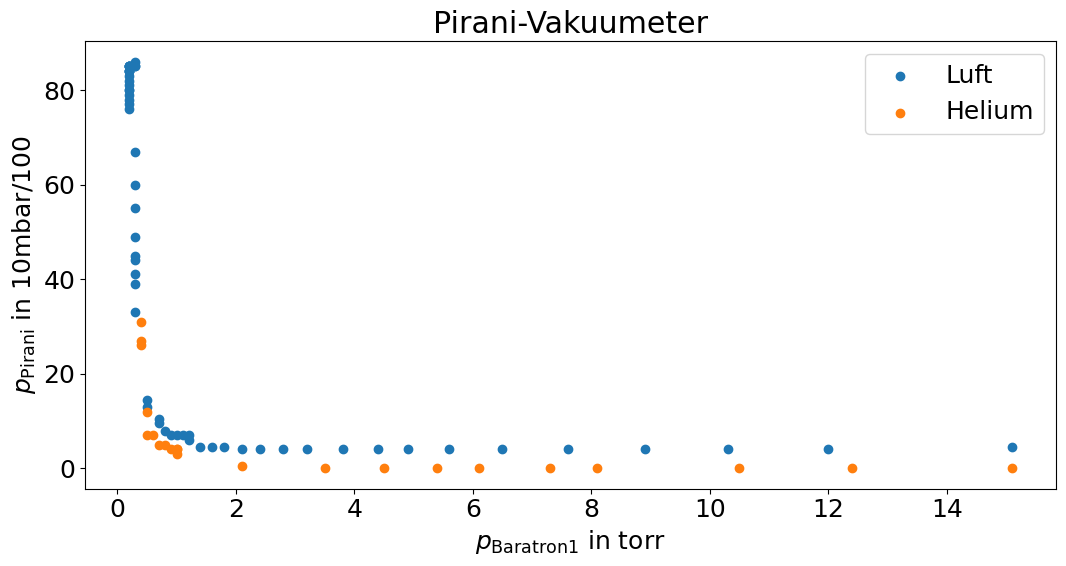

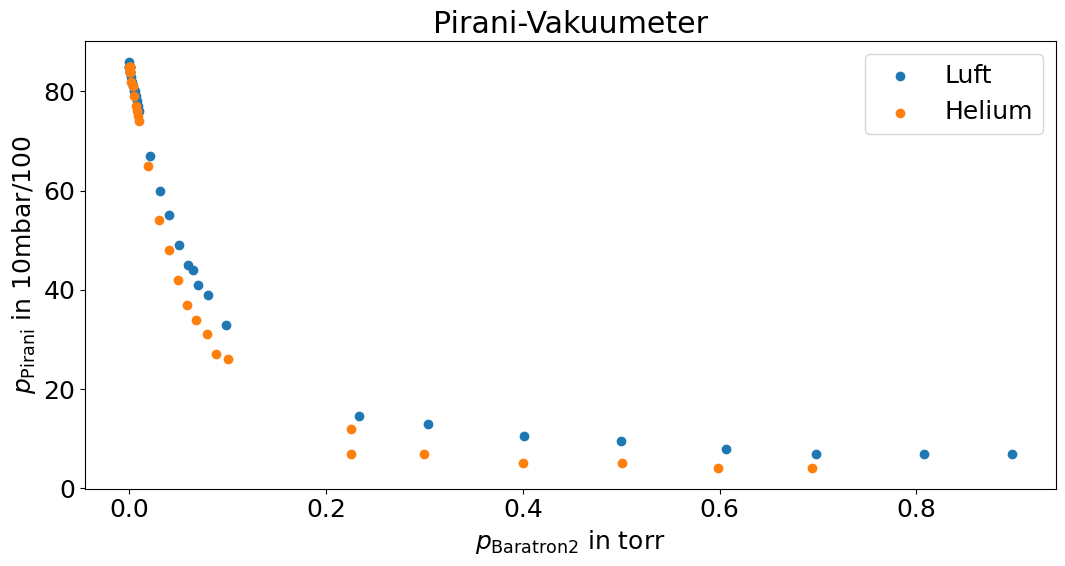

In [276]:
beide.pirani(19,12)

## Ionivac und Penning

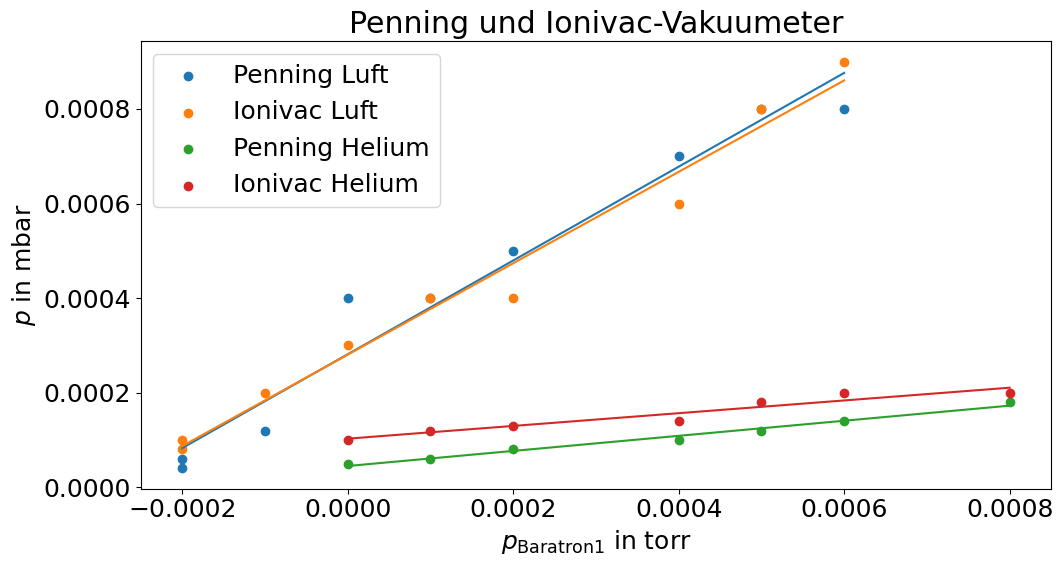

LinregressResult(slope=0.9916923076923074, intercept=0.0002812000000000001, rvalue=0.9808866210848894, pvalue=3.1197526613784686e-06, stderr=0.07435456851921611, intercept_stderr=2.36432459049742e-05)
Umrechnungsfaktor Penning luft/hel 6.216042363433666 pm 0.8083661887872704
Umrechnungsfaktor Ionivac luft/hel 7.175873225486958 pm 1.3382836125094482


In [277]:
beide.ionivac_penning(48,36)